### Objective: 
**To find out the best regression algorithm to use for the house price prediction for King's County**

### Workflow:

1. **Load the dataset**
    - Gather the dataset containing house prices and relevant features for King's County.

2. **Preprocessing the data**
    - Clean the dataset by handling missing values, outliers, and duplicates.
    - Encode categorical variables and normalize/standardize numerical features.

3. **Feature Selection**
    - Select the most relevant features for the prediction task.

4. **Model Selection**
    - Use linear regression model

5. **Model Training**
    - Train the selected regression model on the training dataset.

6. **Model Evaluation**
    - Evaluate the trained models on the testing dataset using appropriate metrics.
    - Analyse the performance of  the model 


***Importing the necessary Modules Required for preprocessing***

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


***Loading the dataset into a pandas dataframe***


In [2]:
data=pd.read_csv(r"C:\Users\Devab\OneDrive\Desktop\Coding\ML-Algorithms\data.csv")

***Exploring The Dataset***

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


***Checking for any null values***


In [5]:
data.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool

***visualising the missing values in the dataset using a heatmap***

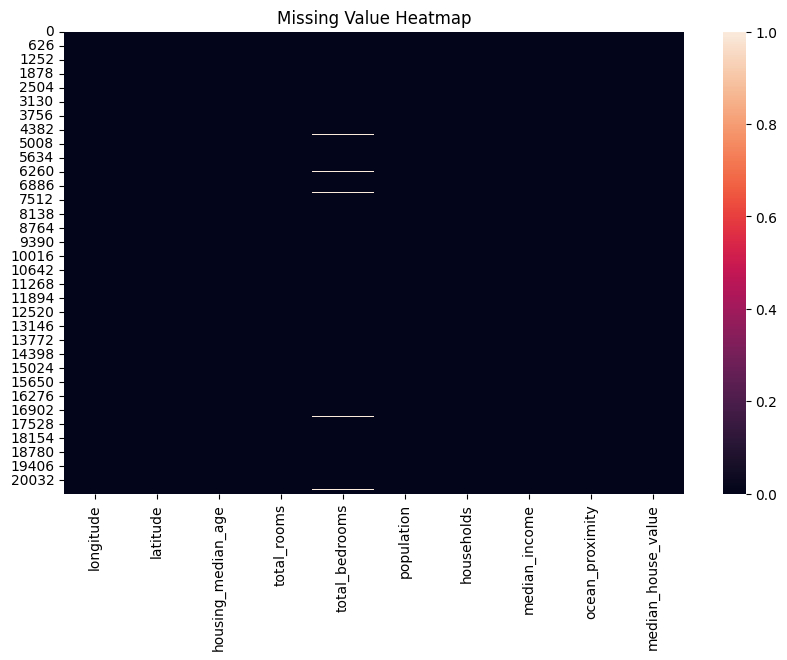

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())
plt.title('Missing Value Heatmap')
plt.show()

***imputing the missing values in "total_bedrooms" column***

Imputing with mean

In [7]:
data['total_bedrooms_mean'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())
data.drop(columns="total_bedrooms",inplace=True)

In [8]:
data.isnull().any()

longitude              False
latitude               False
housing_median_age     False
total_rooms            False
population             False
households             False
median_income          False
ocean_proximity        False
median_house_value     False
total_bedrooms_mean    False
dtype: bool

Visualing the dataset to check for any missing values

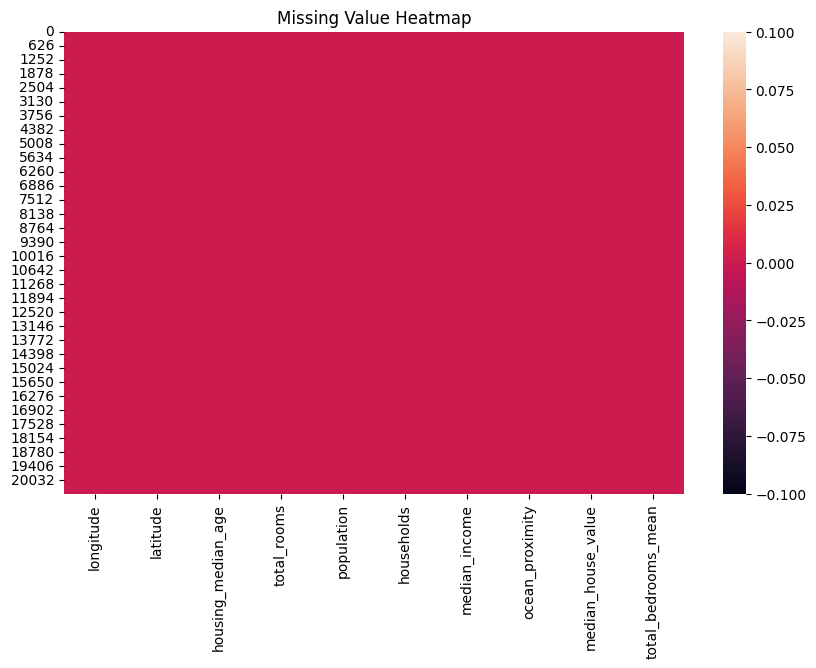

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())
plt.title('Missing Value Heatmap')
plt.show()

***Encoding the categorical column 'ocean_proximity' using one hot encoding***

In [10]:
data_encoded=pd.get_dummies(data, columns=None, drop_first=False, dtype=None) 
data_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,total_bedrooms_mean,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,322,126,8.3252,452600,129.0,False,False,False,True,False
1,-122.22,37.86,21,7099,2401,1138,8.3014,358500,1106.0,False,False,False,True,False
2,-122.24,37.85,52,1467,496,177,7.2574,352100,190.0,False,False,False,True,False
3,-122.25,37.85,52,1274,558,219,5.6431,341300,235.0,False,False,False,True,False
4,-122.25,37.85,52,1627,565,259,3.8462,342200,280.0,False,False,False,True,False


***Standardising the data to improve the performance of the model***

Using standard scaler to get a standardised numpy array of the data

In [11]:
scaler=StandardScaler()
std_data=scaler.fit_transform(data_encoded)
# converting the numpy array into a dataframe with the columns of the original dataframe
standard_data=pd.DataFrame(std_data,columns=data_encoded.columns)

In [12]:
standard_data.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,total_bedrooms_mean,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.974429,-0.977033,2.344766,2.129631,-0.975228,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
1,-1.322844,1.043185,-0.607019,2.045890,0.861439,1.669961,2.332238,1.314156,1.355088,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
2,-1.332827,1.038503,1.856182,-0.535746,-0.820777,-0.843637,1.782699,1.258693,-0.829732,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
3,-1.337818,1.038503,1.856182,-0.624215,-0.766028,-0.733781,0.932968,1.165100,-0.722399,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
4,-1.337818,1.038503,1.856182,-0.462404,-0.759847,-0.629157,-0.012881,1.172900,-0.615066,-0.891156,-0.681889,-0.015566,2.830742,-0.384466


***Selecting the features and the target variable***

Here, we are evaluating the model performance by using 3 feature sets 

Feature Set-1 : All the features present in the dataset

Feature Set-2 : ALL features regarding the house's location 

Feature Set-3 : Features regarding the house's features

In [13]:
X_1=standard_data[["longitude","latitude","housing_median_age","total_rooms","population","households","median_income","total_bedrooms_mean","ocean_proximity_<1H OCEAN","ocean_proximity_INLAND","ocean_proximity_ISLAND","ocean_proximity_NEAR BAY","ocean_proximity_NEAR OCEAN"]]
X_2=standard_data[["longitude","latitude","ocean_proximity_<1H OCEAN","ocean_proximity_INLAND","ocean_proximity_ISLAND","ocean_proximity_NEAR BAY","ocean_proximity_NEAR OCEAN"]]

X_3=standard_data[["housing_median_age","total_rooms","population","households","median_income","total_bedrooms_mean"]]
y=standard_data["median_house_value"]

***importing the necessary libraries for the model***

In [14]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [15]:
lin_reg=LinearRegression()
X_1_train,X_1_test,y_train,y_test=train_test_split(X_1,y,test_size=0.2,random_state=42)
X_2_train,X_2_test,y_train,y_test=train_test_split(X_2,y,test_size=0.2,random_state=42)
X_3_train,X_3_test,y_train,y_test=train_test_split(X_3,y,test_size=0.2,random_state=42)

***Fitting the model with each feature set and evaluating the model***

**Feature Set-1**

Fitting the model with X_1 feature set

X_1=["longitude","latitude","housing_median_age","total_rooms","population","households","median_income",
"total_bedrooms_mean","ocean_proximity_<1H OCEAN","ocean_proximity_INLAND","ocean_proximity_ISLAND",
"ocean_proximity_NEAR BAY","ocean_proximity_NEAR OCEAN"]


In [16]:
lin_reg.fit(X_1_train,y_train)
y1_pred=lin_reg.predict(X_1_test)
print(y1_pred)

[-1.23208677 -0.62356627  0.50509584 ...  2.0138849  -0.74685728
 -0.19998228]


Evaluating the model with mean_squared_error,r2_score and cross validation score 

In [17]:
mse=mean_squared_error(y_test,y1_pred)
print("the mean squared error for the X_1 feature set is: ",mse)
r2=r2_score(y_test,y1_pred)
print("The r2 score for the X_1 feature set is: ",r2)
score=cross_val_score(lin_reg,X_1_train,y_train,cv=10,scoring='neg_mean_squared_error')
print("The cross validation score for the X_1 feature set is: ",score.mean())

the mean squared error for the X_1 feature set is:  0.36845033672738187
The r2 score for the X_1 feature set is:  0.6256053151488734
The cross validation score for the X_1 feature set is:  -0.3538141184871249


Plotting the regression line for X_1 feature set

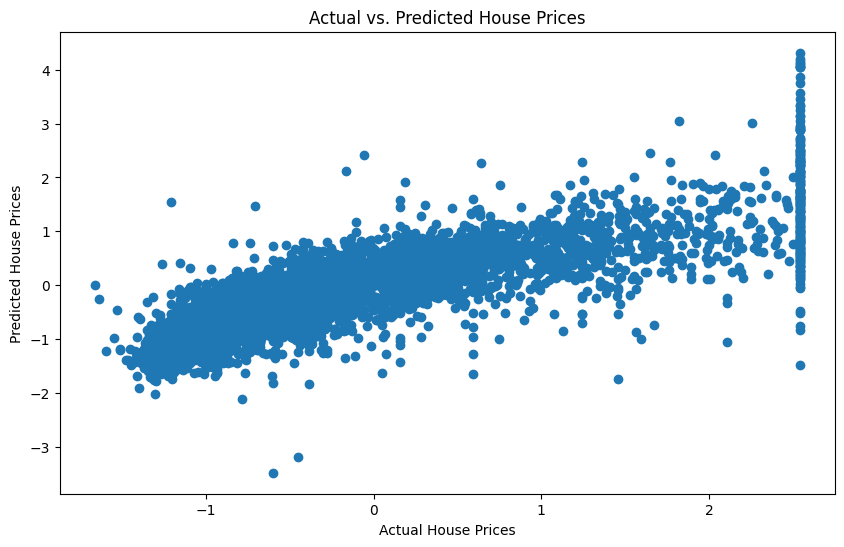

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y1_pred)
plt.title("Actual vs. Predicted House Prices")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.show()

**Feature Set-2**

Fitting the model with X_2 feature set

X_2=["longitude","latitude","ocean_proximity_<1H OCEAN","ocean_proximity_INLAND","ocean_proximity_ISLAND","ocean_proximity_NEAR BAY","ocean_proximity_NEAR OCEAN"]



In [25]:
lin_reg.fit(X_2_train,y_train)
y2_pred=lin_reg.predict(X_2_test)
print(y2_pred)

[-0.73840964 -0.25110495  0.53319681 ...  0.51439798 -0.70825827
  0.22973001]


Evaluating the model with mean_squared_error,r2_score and cross validation score 

In [20]:
mse=mean_squared_error(y_test,y2_pred)
print("the mean squared error for the X_1 feature set is: ",mse)
r2=r2_score(y_test,y2_pred)
print("The r2 score for the X_1 feature set is: ",r2)
score=cross_val_score(lin_reg,X_2_train,y_train,cv=10,scoring='neg_mean_squared_error')
print("The cross validation score for the X_1 feature set is: ",score.mean())

the mean squared error for the X_1 feature set is:  0.7088512017663043
The r2 score for the X_1 feature set is:  0.27971263468270025
The cross validation score for the X_1 feature set is:  -0.735965528572633


Plotting the regression line for X_2 feature set

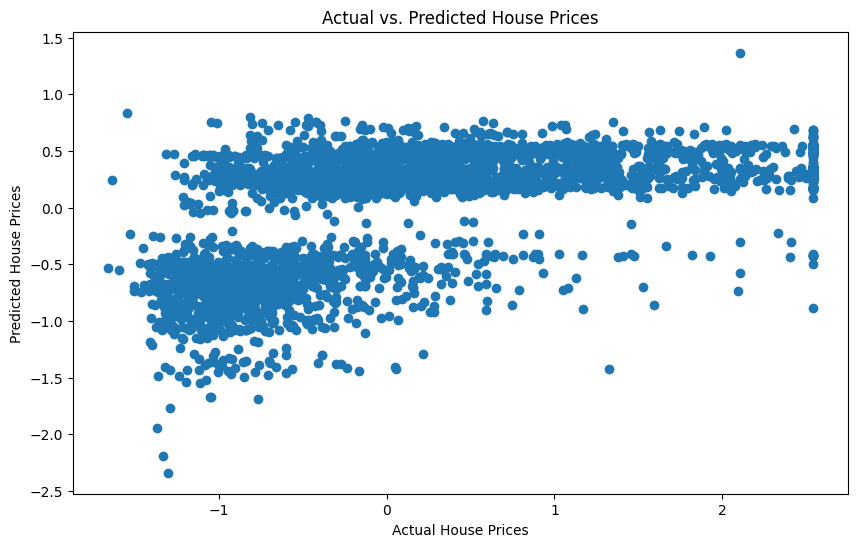

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y2_pred)
plt.title("Actual vs. Predicted House Prices")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.show()

**Feature Set-3**

Fitting the model with X_3 feature set 

X_3=["housing_median_age","total_rooms","population","households","median_income","total_bedrooms_mean"]

In [22]:
lin_reg.fit(X_3_train,y_train)
y3_pred=lin_reg.predict(X_3_test)
print(y3_pred)

[-0.91856711 -0.53808603  0.56016629 ...  1.93756317 -0.3385869
 -0.3757613 ]


Evaluating the model with mean_squared_error,r2_score and cross validation score 

In [23]:
mse=mean_squared_error(y_test,y3_pred)
print("the mean squared error for the X_1 feature set is: ",mse)
r2=r2_score(y_test,y3_pred)
print("The r2 score for the X_1 feature set is: ",r2)
score=cross_val_score(lin_reg,X_3_train,y_train,cv=10,scoring='neg_mean_squared_error')
print("The cross validation score for the X_1 feature set is: ",score.mean())

the mean squared error for the X_1 feature set is:  0.4478971961605374
The r2 score for the X_1 feature set is:  0.544876709594915
The cross validation score for the X_1 feature set is:  -0.4332355892343019


Plotting the regression line for X_3 feature set

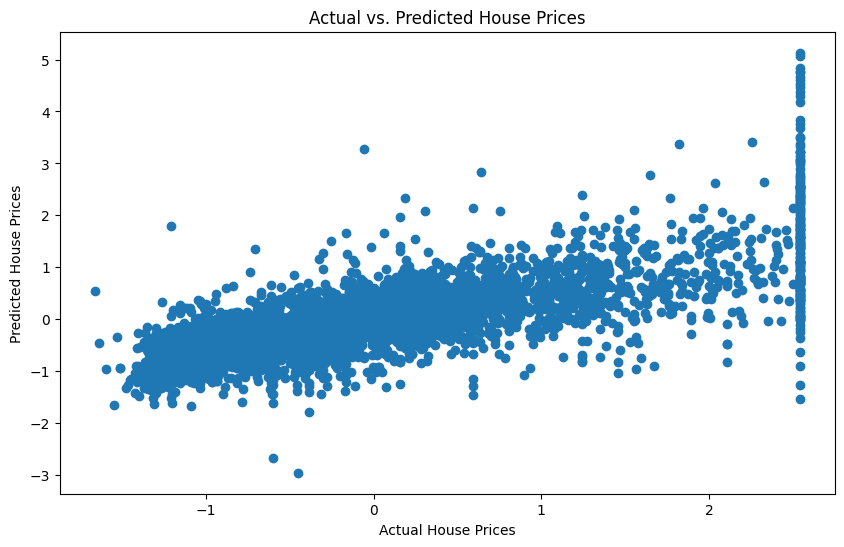

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y3_pred)
plt.title("Actual vs. Predicted House Prices")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.show()